In [1]:
import sys 
sys.path.append('../../')  
from main import device_process_measurement_tomography, Quantities, Cross_Quantities, results2quantities
import QuantumTomography as qt 
import matplotlib.pyplot as plt 
import numpy as np 
from qiskit import QuantumCircuit, Aer, IBMQ 
from qiskit.compiler import transpile 
import json 
from qiskit.result import Result 
from qiskit.test.mock import FakeCasablanca 
from utils_qiskit import * 
from utils_plots import *
from qiskit.providers.ibmq.managed import IBMQJobManager

In [2]:
jobs = [ '00d3107d150c4856bb145bc3fca2f147-16647947252239227',
            '7ce83169d75d4115a8dd2e839692d898-16655968534771705',
            '5373eb205b0e40f180632c1e0774aae4-1666877735257145',
            '04bb65c3638d4ee2bcb2039cf79f24fc-1666877752352261',
            'fce7c304165046509024a820e01ed340-16668777693586967' ]

In [3]:
choi_single = []
povm_single = []
choi_double = []
povm_double = []

quantities_single = []
quantities_double = []
correlations      = []
errores           = []
fit_single        = [] 
fit_double        = [] 
pairs = [ [(1,3),(4,5)], [ (3,5),(0,1) ], [(1,2),(5,6)]    ]

for job in jobs[:1]:

    results_tomography = np.load( 'data_tomo_'+job+'.npy', allow_pickle=True ).all()

    results_single     = results_tomography.single                             
    results_double     = results_tomography.double                            
    results_gateset    = results_tomography.gateset   

    choi_single.append( results_single.chois )
    povm_single.append( results_single.povms )
    choi_double.append( [ results_double[j].chois for j in range(3)] )
    povm_double.append( [ results_double[j].povms for j in range(3)] )
    fit_single.append(  )
    fit_double.append(  ) 

    f0, f1, fc, fd = results_tomography.all_quantities(pairs)

    quantities_single.append( f0 )
    quantities_double.append( f1 )
    correlations.append( fc )
    errores.append( fd )

In [4]:
results_tomography.single.funs 

[[[2.7654446327676694,
   0.012141770958281247,
   0.011905302531943449,
   0.00013870595946439648],
  [2.7957080623548127,
   0.0021509237401656565,
   0.002162860179775603,
   7.781164253605568e-05]],
 [[2.7984392002751646,
   0.019967964422536188,
   0.004415680155941977,
   8.702626537767778e-05],
  [2.7006540703667388,
   0.001921011162539978,
   0.0016736693520808268,
   7.475461570540927e-05]],
 [[2.707612769672165,
   0.014265553724227598,
   0.006561073441167401,
   0.00010298270681112909],
  [2.715289301631629,
   0.0007058568434756262,
   0.0007052487103410955,
   4.337818922436745e-05]],
 [[2.6702238111432512,
   0.03635119222097067,
   0.007277421883334689,
   0.00018354360887758736],
  [2.720481002409721,
   0.0025254555501005495,
   0.00218373537140724,
   9.143436592664655e-05]],
 [[2.7409784700636903,
   0.0020453105065450458,
   0.0020790707750461363,
   0.00013897785202383203],
  [2.755344075539153,
   0.0022881486490898325,
   0.0022329568017119047,
   0.00017839897

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


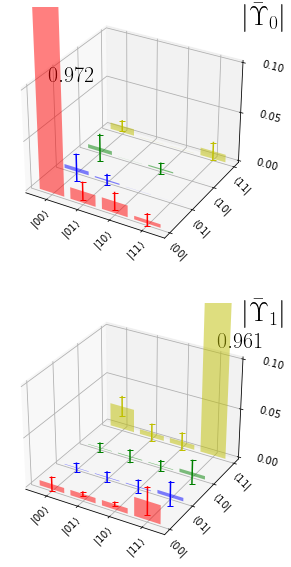

In [4]:
choi_single_mean = np.mean(choi_single, axis=(0,1))
choi_single_std = np.std(choi_single,axis=(0,1))

pos_label = [3.2, 4, 0.12]
Labels = [ r'$|\bar\Upsilon_0|$', r'$|\bar\Upsilon_1|$'  ]
pos_ticks = [0,1,2,3]
x_ticks = [r'$|00\rangle$', r'$|01\rangle$', r'$|10\rangle$',r'$|11\rangle$']
y_ticks = [r'$\langle 00|$', r'$\langle 01|$', r'$\langle 10|$', r'$\langle 11|$']

axes = Plot_Chois( choi_single_mean , error_choi=choi_single_std, shape=(2,1) )
set_ticks( axes, pos_ticks, x_ticks, pos_ticks, y_ticks, pos_label, Labels )
plt.savefig('choi_mean_single.png', bbox_inches='tight', transparent=True )
plt.savefig('choi_mean_single.svg', bbox_inches='tight', transparent=True ) 

In [5]:
abs(choi_single_mean[0]), abs(choi_single_mean[1])

(array([[9.71922581e-01, 3.97607456e-03, 3.97607456e-03, 6.89433686e-03],
        [1.18371920e-02, 1.28178079e-03, 1.07032224e-04, 1.24206317e-04],
        [1.18371920e-02, 1.07032224e-04, 1.28178079e-03, 1.24206317e-04],
        [3.54950409e-03, 3.33879984e-05, 3.33879984e-05, 8.01036420e-03]]),
 array([[5.38560014e-03, 4.63289350e-04, 4.63289350e-04, 2.40205280e-02],
        [5.50578043e-03, 5.86297809e-04, 7.47073942e-04, 5.03762125e-03],
        [5.50578043e-03, 7.47073942e-04, 5.86297809e-04, 5.03762125e-03],
        [1.91434792e-02, 3.56531773e-03, 3.56531773e-03, 9.61073607e-01]]))

In [6]:
1-np.exp(-700/100000),  0.007*100/0.02

(0.0069755570667648925, 35.0)

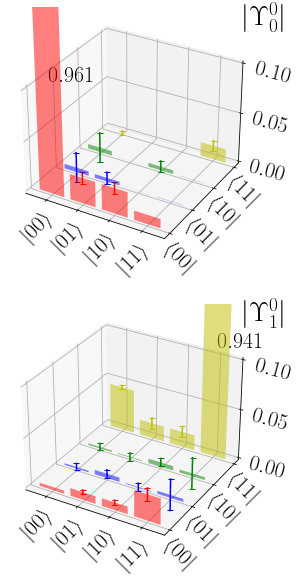

In [7]:
choi_single_mc_mean = np.mean(choi_single,axis=0)
choi_single_mc_std = np.std(choi_single,axis=0)

pos_label = [3.2, 4, 0.12]
Labels = [ r'$|\Upsilon_0^0|$', r'$|\Upsilon_1^0|$'  ]
pos_ticks = [0,1,2,3]
x_ticks = [r'$|00\rangle$', r'$|01\rangle$', r'$|10\rangle$',r'$|11\rangle$']
y_ticks = [r'$\langle 00|$', r'$\langle 01|$', r'$\langle 10|$', r'$\langle 11|$']

axes = Plot_Chois( choi_single_mc_mean[0], choi_single_mc_std[0], shape=(2,1)  )
set_ticks( axes, pos_ticks, x_ticks, pos_ticks, y_ticks, pos_label, Labels )
plt.savefig('choi_single_worst.png', bbox_inches='tight', transparent=True )
plt.savefig('choi_single_worst.svg', bbox_inches='tight', transparent=True )

In [8]:
abs( choi_single_mc_mean[0][0] ), abs( choi_single_mc_mean[0][1] )

(array([[9.61119608e-01, 4.69680878e-03, 4.69680878e-03, 6.24864729e-05],
        [2.58054785e-02, 3.82133501e-03, 1.04589355e-04, 4.95803705e-05],
        [2.58054785e-02, 1.04589355e-04, 3.82133501e-03, 4.95803705e-05],
        [9.31353497e-03, 3.22082754e-04, 3.22082754e-04, 1.42870852e-02]]),
 array([[3.19075369e-03, 1.69149749e-03, 1.69149749e-03, 4.50101023e-02],
        [7.81110895e-03, 4.57100274e-03, 8.08126451e-04, 1.57944624e-02],
        [7.81110895e-03, 8.08126451e-04, 4.57100274e-03, 1.57944624e-02],
        [2.63793337e-02, 3.02298245e-03, 3.02298245e-03, 9.40637096e-01]]))

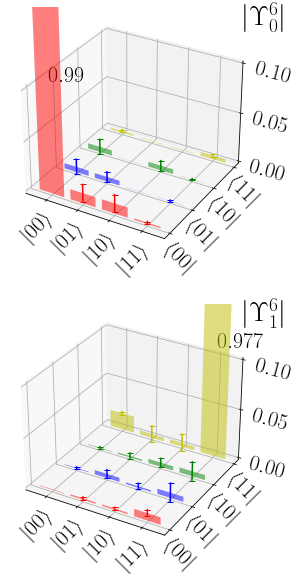

In [9]:

pos_label = [3.2, 4, 0.12]
Labels = [ r'$|\Upsilon_0^6|$', r'$|\Upsilon_1^6|$'  ]
pos_ticks = [0,1,2,3]
x_ticks = [r'$|00\rangle$', r'$|01\rangle$', r'$|10\rangle$',r'$|11\rangle$']
y_ticks = [r'$\langle 00|$', r'$\langle 01|$', r'$\langle 10|$', r'$\langle 11|$']

axes = Plot_Chois( choi_single_mc_mean[6], choi_single_mc_std[6], shape=(2,1) )
set_ticks( axes, pos_ticks, x_ticks, pos_ticks, y_ticks, pos_label, Labels )
plt.savefig('choi_single_best.png', bbox_inches='tight', transparent=True )
plt.savefig('choi_single_best.svg', bbox_inches='tight', transparent=True )

In [10]:
choi_single_mc_mean[6][0], choi_single_mc_mean[6][1]

(array([[ 9.90291984e-01+0.j        , -3.23782379e-03+0.00437286j,
         -3.23782379e-03-0.00437286j,  1.82102248e-03+0.j        ],
        [ 5.84889647e-03-0.00855808j, -3.27831507e-03-0.00363864j,
          6.50230395e-05-0.00016948j, -4.74267348e-04-0.00039265j],
        [ 5.84889647e-03+0.00855808j,  6.50230395e-05+0.00016948j,
         -3.27831507e-03+0.00363864j, -4.74267348e-04+0.00039265j],
        [ 1.43961918e-03+0.j        ,  1.14737422e-04+0.00020059j,
          1.14737422e-04-0.00020059j,  3.83897189e-03+0.j        ]]),
 array([[ 6.42835066e-04+0.00000000e+00j, -3.01371326e-04-5.86009751e-04j,
         -3.01371326e-04+5.86009751e-04j,  1.73064286e-02+0.00000000e+00j],
        [-1.09001361e-03-1.10686520e-03j,  1.51500716e-03-4.12953332e-03j,
          1.63702020e-03-7.74007261e-05j,  1.07055574e-03+3.96248274e-03j],
        [-1.09001361e-03+1.10686520e-03j,  1.63702020e-03+7.74007261e-05j,
          1.51500716e-03+4.12953332e-03j,  1.07055574e-03-3.96248274e-03j],
     

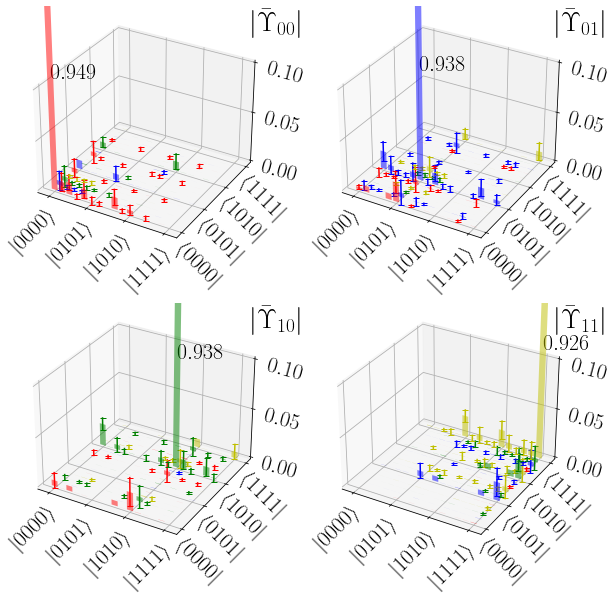

In [35]:
choi_double_mean = np.mean( choi_double, axis=(0,1,2) )
choi_double_std = np.std( choi_double, axis=(0,1,2) )

pos_label = [16., 16, 0.13]
Labels = [ r'$|\bar\Upsilon_{00}|$', r'$|\bar\Upsilon_{01}|$', r'$|\bar\Upsilon_{10}|$', r'$|\bar\Upsilon_{11}|$' ]
pos_ticks = [0,5,10,15]
x_ticks = [r'$|0000\rangle$', r'$|0101\rangle$', r'$|1010\rangle$',r'$|1111\rangle$']
y_ticks = [r'$\langle 0000|$', r'$\langle 0101|$', r'$\langle 1010|$', r'$\langle 1111|$']
axes = Plot_Chois( choi_double_mean, choi_double_std, shape=(2,2) )
axes = set_ticks( axes, pos_ticks, x_ticks, pos_ticks, y_ticks, pos_label, Labels )
plt.savefig('choi_double_mean.png', bbox_inches='tight', transparent=True )
plt.savefig('choi_double_mean.svg', bbox_inches='tight', transparent=True )


In [90]:
np.sort( abs(choi_double_mean)[3].flatten() )

array([5.54191692e-07, 5.54191692e-07, 7.13517588e-07, 7.13517588e-07,
       1.10067218e-06, 1.10067218e-06, 1.10881769e-06, 1.10881769e-06,
       1.22197799e-06, 1.22197799e-06, 1.55896085e-06, 1.55896085e-06,
       1.89927794e-06, 1.89927794e-06, 3.62617679e-06, 3.62617679e-06,
       3.64286687e-06, 3.64286687e-06, 4.37570807e-06, 4.37570807e-06,
       5.20012474e-06, 5.20012474e-06, 5.67470047e-06, 5.67470047e-06,
       5.70672917e-06, 5.70672917e-06, 5.74493661e-06, 5.74493661e-06,
       6.07611849e-06, 6.07611849e-06, 6.47015680e-06, 6.47015680e-06,
       7.46123848e-06, 7.46123848e-06, 8.08717214e-06, 8.43437541e-06,
       8.43437541e-06, 8.60847069e-06, 8.60847069e-06, 8.64646332e-06,
       8.64646332e-06, 9.92450601e-06, 9.92450601e-06, 1.18331288e-05,
       1.18331288e-05, 1.18490212e-05, 1.18490212e-05, 1.18519346e-05,
       1.18519346e-05, 1.42356441e-05, 1.42356441e-05, 1.47974055e-05,
       1.47974055e-05, 1.52279797e-05, 1.52279797e-05, 1.55023090e-05,
      

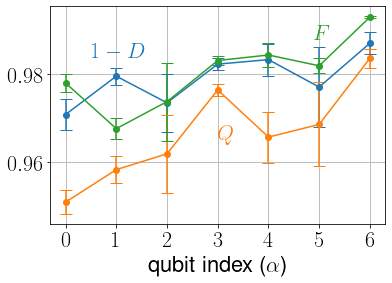

In [33]:
quantities_single_mean = np.mean(quantities_single,axis=0)
quantities_single_std = np.std(quantities_single,axis=0)


for j in [2,1,0]:
    plt.errorbar( range(7), quantities_single_mean[:,j], quantities_single_std[:,j], capsize=6,  fmt='-o' )
plt.grid()
plt.xlabel('qubit index ($\\alpha$)')
plt.xticks([0,1,2,3,4,5,6])
# plt.ylim( bottom=0.925)
plt.text( 4.9, 0.988, '$F$', color='tab:green' )
plt.text( 3, 0.965, '$Q$', color='tab:orange' )
plt.text( 0.5, 0.984, '$1-D$', color='tab:blue' )
plt.savefig('quantities_single.svg', bbox_inches='tight', transparent=True )
plt.savefig('quantities_single.png', bbox_inches='tight', transparent=True  )

In [13]:
quantities_single_mean

array([[0.97804557, 0.95087835, 0.97084167],
       [0.96763618, 0.95829039, 0.97958404],
       [0.97378228, 0.96190074, 0.97352508],
       [0.98314828, 0.97645061, 0.98233308],
       [0.98441176, 0.96570594, 0.98335532],
       [0.98195161, 0.96859735, 0.97711218],
       [0.99304134, 0.98366328, 0.98709623]])

In [14]:
import seaborn as sns
import matplotlib

def create_color_map( error_mean, vmin=0, vmax=100, **args):
    color_map = sns.cubehelix_palette( reverse=True, as_cmap=True, **args)
    colors = matplotlib.colors.Normalize( vmin=vmin, vmax=vmax )
    l_colors = [255*np.array(color_map(colors(100*err))) for err in error_mean ]
    return 255*np.array(color_map(colors(0))), 255*np.array(color_map(colors(100))), l_colors

In [15]:
np.mean(quantities_single,axis=(0,1))

array([0.98028815, 0.96649809, 0.97912108])

In [16]:
create_color_map(np.mean( quantities_single, (0,2) ), 96, 99, start=2.8, rot=.1 )

(array([ 28.80987579,  38.16447768,  62.18182783, 255.        ]),
 array([217.75517571, 211.88998467, 242.34884824, 255.        ]),
 [array([ 65.18201614,  75.30755998, 118.30862295, 255.        ]),
  array([ 76.39660495,  85.59298838, 132.55610384, 255.        ]),
  array([ 84.7606518 ,  93.05365386, 142.45605758, 255.        ]),
  array([157.65813872, 155.5164045 , 208.61731666, 255.        ]),
  array([138.54301286, 139.09759144, 194.26856126, 255.        ]),
  array([125.10210006, 127.69243143, 183.00780832, 255.        ]),
  array([205.08839129, 199.06283869, 236.60389124, 255.        ])])

In [68]:
quantities_single_mean

array([[0.97804557, 0.95087835, 0.97084167],
       [0.96763618, 0.95829039, 0.97958404],
       [0.97378228, 0.96190074, 0.97352508],
       [0.98314828, 0.97645061, 0.98233308],
       [0.98441176, 0.96570594, 0.98335532],
       [0.98195161, 0.96859735, 0.97711218],
       [0.99304134, 0.98366328, 0.98709623]])

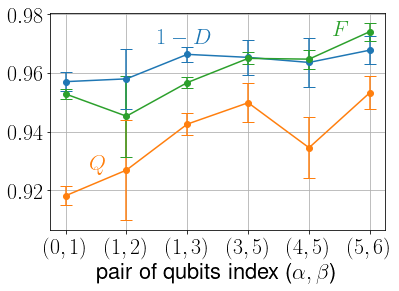

In [80]:
order_pairs = [ 3, 4, 0, 2, 1, 5 ]
quantities_double_mean = np.mean(quantities_double, axis=0)
quantities_double_std = np.std(quantities_double, axis=0)
for j in [2,1,0]:
    plt.errorbar( range(6), quantities_double_mean[order_pairs,j], quantities_double_std[order_pairs,j], capsize=6,  fmt='-o' )
plt.xticks( [0,1,2,3,4,5], ['$(0,1)$', '$(1,2)$', '$(1,3)$', '$(3,5)$', '$(4,5)$', '$(5,6)$'] )
plt.text( 4.4, 0.973, '$F$', color='tab:green' )
plt.text( 0.4, 0.927, '$Q$', color='tab:orange' )
plt.text( 1.5, 0.97, '$1-D$', color='tab:blue' )
plt.grid()
plt.xlabel('pair of qubits index ($\\alpha,\\beta$)')
plt.savefig('quantities_double_mean.png', bbox_inches='tight', transparent=True )
plt.savefig('quantities_double_mean.svg', bbox_inches='tight', transparent=True )


In [60]:
np.mean(quantities_double_mean,axis=0)

array([0.95982137, 0.93757626, 0.96306183])

In [61]:
np.mean( quantities_double, (0,2) )

array([0.95525773, 0.95431721, 0.96009734, 0.94271435, 0.94341916,
       0.96511315])

In [65]:
create_color_map(np.mean( quantities_double, (0,2) )[order_pairs], 94, 97, rot = -.4  )

(array([ 27.77491317,  38.77109381,  61.7507723 , 255.        ]),
 array([198.59433255, 228.9180809 , 203.27276485, 255.        ]),
 [array([ 36.41701527,  57.54401704,  82.9447735 , 255.        ]),
  array([ 38.4728727 ,  62.38444258,  87.73922931, 255.        ]),
  array([ 84.44995118, 148.88655626, 143.83553126, 255.        ]),
  array([115.09633091, 179.69551079, 158.64276407, 255.        ]),
  array([ 80.01312508, 143.16409232, 141.17465528, 255.        ]),
  array([154.98532324, 206.81042325, 177.14737459, 255.        ])])

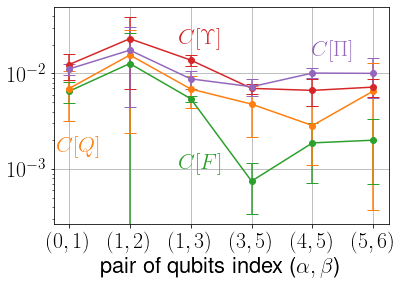

In [63]:
correlations_mean = np.mean(correlations, axis=0 )
correlations_std  = np.std(correlations, axis=0 )
errores_mean      = np.mean(errores, axis=0 )
errores_std       = np.std(errores, axis=0 )

color = [ 'tab:green', 'tab:orange', 'tab:red', 'tab:purple']

for j in [0,1]:
    plt.errorbar( range(6), errores_mean[order_pairs,j], errores_std[order_pairs,j], capsize=6,  fmt='-o', c=color[j] )
for j in [0,1]:
    plt.errorbar( range(6), correlations_mean[order_pairs,j], correlations_std[order_pairs,j], capsize=6,  fmt='-o', c=color[2+j] )
plt.yscale('log')
plt.grid()
plt.xticks( [0,1,2,3,4,5], ['$(0,1)$', '$(1,2)$', '$(1,3)$', '$(3,5)$', '$(4,5)$', '$(5,6)$'] )
plt.text( 1.8, 1e-3, '$C[F]$', color='tab:green' )
plt.text( -.2, 1.5e-3, '$C[Q]$', color='tab:orange' )
plt.text( 4, 1.5e-2, '$C[\\Pi]$', color='tab:purple' )
plt.text( 1.8, 2e-2, '$C[\\Upsilon]$', color='tab:red' )
plt.xlabel('pair of qubits index ($\\alpha,\\beta$)')
plt.savefig('correlations_double_mean.png', bbox_inches='tight', transparent=True )
plt.savefig('correlations_double_mean.svg', bbox_inches='tight', transparent=True )


In [91]:
errores_mean

array([[0.00544379, 0.00687863],
       [0.00188094, 0.00285658],
       [0.00075012, 0.00477986],
       [0.00650249, 0.00694464],
       [0.0126896 , 0.01557073],
       [0.00200779, 0.0065558 ]])

In [92]:
correlations_mean

array([[0.01378892, 0.00877529],
       [0.00665305, 0.01008957],
       [0.00698359, 0.00726428],
       [0.01236058, 0.0111181 ],
       [0.02306157, 0.01750453],
       [0.00719865, 0.01001858]])